In [3]:
import numpy as np
import pandas as pd

In [4]:
# random seed

np.random.seed(42)

set1no=900
set2no=100

In [5]:
df1=pd.DataFrame({
    "feature_1":np.random.normal(loc=0,scale=1,size=set1no),
    "feature_2":np.random.normal(loc=0,scale=1,size=set1no),
    "target": [0]*set1no
})

df2=pd.DataFrame({
    "feature_1":np.random.normal(loc=0,scale=1,size=set2no),
    "feature_2":np.random.normal(loc=0,scale=1,size=set2no),
    "target": [1]*set2no
})

In [7]:
df1.head()

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0


In [9]:
df2.head()

,feature_1,feature_2,target
0,1.901191,0.696954,1
1,-0.060661,-0.333819,1
2,-0.708407,1.173125,1
3,-1.513714,0.369642,1
4,-1.803140,-0.107302,1


In [10]:
df=pd.concat([df1,df2]).reset_index(drop=True)

In [11]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [36]:
df["target"].unique()

array([0, 1], dtype=int64)

In [38]:
df["target"].value_counts() # yapay bir dengesiz veri seti oluşturduk

target
0    900
1    100
Name: count, dtype: int64

In [40]:
# upsampling --> upsample minority  --> azınlıkları arttırma

# downsampling --> downsample majority --> çoğunlukları azaltma

In [41]:
# upsampling --> 100'ü 900'e çıkaralım

In [42]:
df_minority=df[df["target"]==1]

In [43]:
df_minority

,feature_1,feature_2,target
900,1.901191,0.696954,1
901,-0.060661,-0.333819,1
902,-0.708407,1.173125,1
903,-1.513714,0.369642,1
904,-1.803140,-0.107302,1
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [44]:
df_majority=df[df["target"]==0]

df_majority

# Resampling yöntemi ile veri setini dengeli hale getirme

In [46]:
from sklearn.utils import resample

In [48]:
df_minority_upsampled=resample(df_minority,n_samples=len(df_majority),random_state=42)

In [49]:
df_minority_upsampled  # --> target'ı 1 olan 900 değer üretildi 

,feature_1,feature_2,target
951,1.775311,1.261922,1
992,-0.436386,1.188913,1
914,-0.268531,-1.801058,1
971,-0.214921,-2.940389,1
960,-0.134309,-0.054894,1
...,...,...,...
952,-1.193637,-0.905732,1
965,-1.662492,0.089581,1
976,-0.562168,1.124113,1
942,-0.548725,0.269127,1


In [51]:
df_minority_upsampled.shape

(900, 3)

In [52]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [53]:
df_upsampled["target"].value_counts() # veri seti dengelendi

target
0    900
1    900
Name: count, dtype: int64

In [54]:
# downsampling --> 900'ü 100'e düşürelim

In [55]:
df_majority_donwsampled=resample(df_majority,n_samples=len(df_minority),random_state=42)

In [56]:
df_majority_donwsampled # --> target'ı 0 olan 100 değer üretildi 

,feature_1,feature_2,target
102,-0.342715,0.059630,0
435,0.074095,-0.337086,0
860,0.202923,1.639965,0
270,1.441273,0.758929,0
106,1.886186,0.895193,0
...,...,...,...
201,0.560785,-2.896255,0
269,0.130741,0.853416,0
862,1.547505,0.075434,0
815,-1.485560,-0.090533,0


In [58]:
df_majority_donwsampled.shape

(100, 3)

In [59]:
df_downsampled=pd.concat([df_majority_donwsampled,df_minority])

In [61]:
df_downsampled["target"].value_counts() # veri seti dengelendi

target
0    100
1    100
Name: count, dtype: int64

# SMOTE (Synthetic Minority Over-sampling Technique) yöntemi ile veri setini dengeli hale getirme

In [62]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


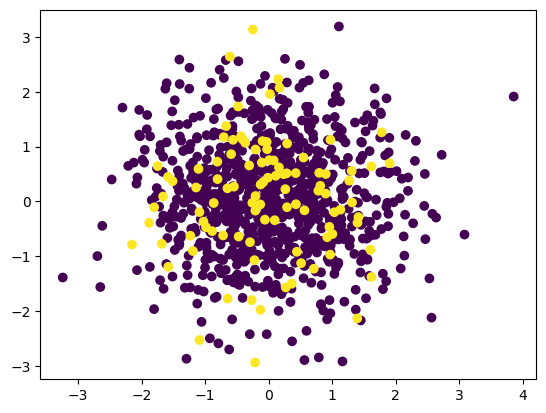

In [63]:
import matplotlib.pyplot as plt
plt.scatter(df["feature_1"],df["feature_2"],c=df["target"])

In [64]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
oversample = SMOTE()

In [ ]:
(X,y)=oversample.fit_resample(df[["feature_1","feature_2"]],df["target"])

In [75]:
X

,feature_1,feature_2
0,0.496714,0.368673
1,-0.138264,-0.393339
2,0.647689,0.028745
3,1.523030,1.278452
4,-0.234153,0.191099
...,...,...
1795,-0.032558,1.097042
1796,0.830294,0.172007
1797,-0.564654,-0.762093
1798,-0.186131,-0.131290


In [76]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [77]:
oversample_df=pd.concat([X,y],axis=1)

In [78]:
oversample_df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
1795,-0.032558,1.097042,1
1796,0.830294,0.172007,1
1797,-0.564654,-0.762093,1
1798,-0.186131,-0.131290,1


In [79]:
oversample_df["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

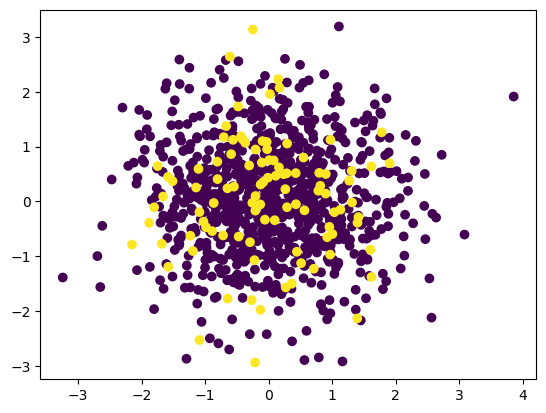

In [80]:
plt.scatter(df["feature_1"],df["feature_2"],c=df["target"]) # eski ve dengesiz hali

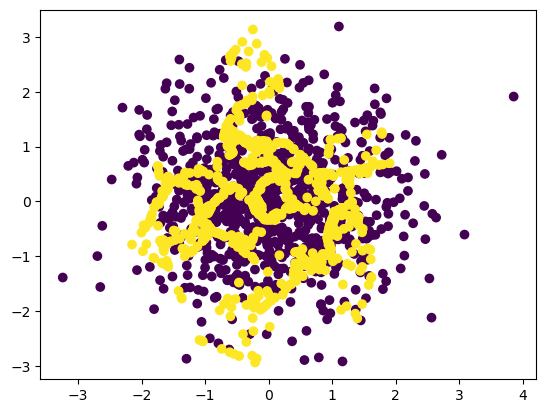

In [81]:
plt.scatter(oversample_df["feature_1"],oversample_df["feature_2"],c=oversample_df["target"]) # yeni ve dengeli hali